# Мастерская 27DA+ "Анализ данных медицинского центра"

##### Кудряшова С.Е.
##### Telegram: +7 950 379 73 73

### **Цель проекта:** определить ключевые факторы изменения стоимости услуг медицинского центра

**Описание данных**

- record_id - идентификатор строки данных
- service_date - дата оказания услуги
- service_name - название услуги
- service_number - количество услуг
- service_amount - стоимость оказанных услуг в рублях
- insured - уникальный идентификатор клиента
- sex_id - пол клиента
- age_for_service_date - возраст пациента

**План исследования:**
1. Загрузка данных и изучение общей информации
2. Предобработка данных
   - проверка данных на дубликаты
   - проверка пропущенных значений
   - добавление новых столбцов
3. Исследовательский анализ данных
   - анализ динамики выручки
   - анализ числа посещений
   - анализ количества уникальных клиентов медицинского центра
   - анализ категорий медицинских услуг (количество оказанных услуг и средние цены)
   - анализ возрастных категорий клиентов
   - анализ стоимости услуг по половому признаку
4. Оформление выводов

## 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

In [3]:
data = pd.read_excel('file:///C:\\Users\\Светлана\\Downloads\\data_test_task_2022.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [5]:
data.head(5)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   

   service_number  insured  sex_id  age_for_service_date  
0               1   490777     2.0                    26  
1               1   490777     2.0                    26  
2               1   490777     2.0                    26  
3               1   490777     2.0                    26  
4               1   490777     2.0                    26

## 2. Предобработка данных

In [6]:
data['sex_id'].sort_values().unique()

array([ 1.,  2., nan])

Пропущенные данные присутствуют в столбце с идентификатором пола. Пропуски оставим, для анализа по половому признаку нулевые значения нужно будет отсечь

In [7]:
data['age_for_service_date'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 74, 75, 83], dtype=int64)

In [8]:
data['service_number'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16], dtype=int64)

In [9]:
#меняем формат даты в столбце с датой приема и добавим столбец с годом
data['service_date'] = pd.to_datetime(data['service_date'], format='%Y-%m-%d')
data['year'] = data['service_date'].dt.year
data.head(10)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   
5  30268157503   2021-01-24   
6  30268157603   2021-01-24   
7  30268157703   2021-01-26   
8  30268157803   2021-01-26   
9  30268157903   2021-01-26   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   
5                                 С-реактивный белок             420   
6                Взятие крови из периферической вены             158   
7                                    Прием первичный            1470   
8                           Магнитотерапия (1 сеанс)            1040   
9                     УВЧ-терапия (1 сеанс) (1 поле)            1040   

   service_number  insured  sex_id  age_for_service_date  year  
0               1   490777     2.0                    26  2021  
1               1   490777     2.0                    26  2021  
2               1   490777     2.0                    26  2021  
3               1   490777     2.0                    26  2021  
4               1   490777     2.0                    26  2021  
5               1   490777     2.0                    26  2021  
6               1   490777     2.0                    26  2021  
7               1   490777     2.0                    26  2021  
8               1   490777     2.0                    26  2021  
9               1   490777     2.0                    26  2021

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             85369 non-null  int64         
 1   service_date          85369 non-null  datetime64[ns]
 2   service_name          85369 non-null  object        
 3   service_amount        85369 non-null  int64         
 4   service_number        85369 non-null  int64         
 5   insured               85369 non-null  int64         
 6   sex_id                85348 non-null  float64       
 7   age_for_service_date  85369 non-null  int64         
 8   year                  85369 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(1)
memory usage: 5.5+ MB


In [11]:
data.duplicated().sum()

0

Полные явные дубликаты отсутствуют

In [12]:
data['service_name'].sort_values().unique()

array(['(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )',
       '(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )',
       '(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)',
       '(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)',
       '(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)',
       '17-OH - гидроксипрогестерон',
       '25-OH витамин D (25-гидроксихолекальциферол)', 'Ascaris IgG',
       'Bordetella (pertusis) IgA', 'Bordetella (pertusis) IgG',
       'Bordetella (pertusis) IgM', 'Bordetella pertussis (Слюна)',
       'Bordetella pertussis (Соскоб)', 'CMV (цитомегаловирус) (Кровь)',
       'CMV (цитомегаловирус)

In [13]:
#создаем словарь для категоризации услуг
med_categories={'Компьютерная томография' : ['МСКТ'],
                'Биопсия' : ['биопсия', 'Биопсия'],
                'Гастроэнтерология' : ['гастро', 'Гастро'],
                'Гинекология/урология' : ['гинеколог', 'Гинеколог'],
                'Лазеротерапия' : ['Лазеротерапия'],
                'Магнитотерапия' : ['Магнит', 'SIS'],
                'Мануальная терапия' : ['мануал', 'Мануал'],
                'Массаж' : ['массаж', 'Массаж'],
                'МРТ' : ['МРТ'],
                'Отоларингология' : ['Анемизация слизистой носа', 'Тимпанометрия', 'Эндоскопическая визуализация'],
                'Офтальмология' : ['глаз', 'Рефрактометрия', 'зрения', 'очков'],
                'Первичный прием' : ['первичный'],
                'Повторный прием' : ['повторный'],
                'Рентгенография' : ['Рентген', 'рентген'],
                'Рефлексотерапия' : ['рефлекс'],
                'УЗИ' : ['сканирование', 'УЗИ', 'Ультразвук', 'скрининг'],
                'Физиотерапия' : ['токи', 'Физиотерапия', 'Фонофорез', 'СМТ', 'Ударно-волновая терапия','УВЧ'],
                'ЭКГ/ЭхоКГ' : ['ЭКГ', 'Эхокардио'],'Электронейромиография': ['Электронейромиография'],
                'Сестринские процедуры' : ['инъекция','Инъекция', 'инфузия','компресс','Перевязка'],
                'Электрофорез' : ['Электрофорез', 'электрофорез'],
                'Анализы' : ['Ig', 'OH', 'Слюна', 'Соскоб', 'Кровь', '(кал)', 'Rh-фактор', 'гормон', \
                             'АЛТ','Альбумин', 'Альдостерон', 'альфа', 'Альфа', 'Анализ', 'Антитела', 'антитела', \
                             'АСТ', 'АТ к','фракции', 'Билирубин', 'Взятие', 'ГГТ', 'Гепатит', 'соскоб', 'крови', 'Аллергопанель', \
                             'гормон','Забор', 'Исследование', 'Кальций', 'моча', 'кровь', 'слюна', 'Креатин', 'Лактат', 'ЛДГ','моче', \
                             'Моче', 'анализ', 'Плесень', 'Посев', 'Прогестерон', 'антиген', 'гепатит', 'Пыльца','белок', 'T3', 'T4', \
                             'Тестостерон', 'HLA', 'ТТГ', 'Фосфотаза', 'Холестерин']
               }

In [14]:
#напишем функцию для определения категории медицинской услуги
def categorize_service(service):
    for category, item_list in med_categories.items():
        for item in item_list:
            if item in service:
               return category
    return 'Прочее'

In [15]:
data['service_category']=data['service_name'].apply(categorize_service)
data.head(10)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   
5  30268157503   2021-01-24   
6  30268157603   2021-01-24   
7  30268157703   2021-01-26   
8  30268157803   2021-01-26   
9  30268157903   2021-01-26   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   
5                                 С-реактивный белок             420   
6                Взятие крови из периферической вены             158   
7                                    Прием первичный            1470   
8                           Магнитотерапия (1 сеанс)            1040   
9                     УВЧ-терапия (1 сеанс) (1 поле)            1040   

   service_number  insured  sex_id  age_for_service_date  year  \
0               1   490777     2.0                    26  2021   
1               1   490777     2.0                    26  2021   
2               1   490777     2.0                    26  2021   
3               1   490777     2.0                    26  2021   
4               1   490777     2.0                    26  2021   
5               1   490777     2.0                    26  2021   
6               1   490777     2.0                    26  2021   
7               1   490777     2.0                    26  2021   
8               1   490777     2.0                    26  2021   
9               1   490777     2.0                    26  2021   

  service_category  
0  Первичный прием  
1          Анализы  
2          Анализы  
3          Анализы  
4           Прочее  
5          Анализы  
6          Анализы  
7  Первичный прием  
8   Магнитотерапия  
9     Физиотерапия

In [16]:
#добавим столбец с номером месяца
data['month'] = data['service_date'].dt.month
data.head(10)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   
5  30268157503   2021-01-24   
6  30268157603   2021-01-24   
7  30268157703   2021-01-26   
8  30268157803   2021-01-26   
9  30268157903   2021-01-26   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   
5                                 С-реактивный белок             420   
6                Взятие крови из периферической вены             158   
7                                    Прием первичный            1470   
8                           Магнитотерапия (1 сеанс)            1040   
9                     УВЧ-терапия (1 сеанс) (1 поле)            1040   

   service_number  insured  sex_id  age_for_service_date  year  \
0               1   490777     2.0                    26  2021   
1               1   490777     2.0                    26  2021   
2               1   490777     2.0                    26  2021   
3               1   490777     2.0                    26  2021   
4               1   490777     2.0                    26  2021   
5               1   490777     2.0                    26  2021   
6               1   490777     2.0                    26  2021   
7               1   490777     2.0                    26  2021   
8               1   490777     2.0                    26  2021   
9               1   490777     2.0                    26  2021   

  service_category  month  
0  Первичный прием      1  
1          Анализы      1  
2          Анализы      1  
3          Анализы      1  
4           Прочее      1  
5          Анализы      1  
6          Анализы      1  
7  Первичный прием      1  
8   Магнитотерапия      1  
9     Физиотерапия      1

## 3. Анализ данных

Основными драйверами изменения стоимости медицинских услуг могут быть:
 1. Увеличение количества оказанных услуг и числа пациентов
 2. Изменение структуры категорий медицинских услуг или рост цен на наиболее популярные категории
 3. Изменение половозрастной структуры пациентов

### Анализ динамики выручки по годам (2022 vs. 2021)

In [17]:
data['service_amount'].describe()

count    85369.000000
mean      1166.094636
std        799.062660
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

- Минимальная стоимость услуг в мед.центре 147 руб
- Максимальная стоимость - 26999 руб

In [18]:
#Строим сводную таблицу по продажам по месяцам в 2021 и 2022 гг.
data_per_month = data.pivot_table(index='month',columns='year',values='service_amount', aggfunc='sum')

data_per_month.columns=['Sales 2021','Sales 2022']

#Добавляем медианные значения выручки по годам

data_per_month['Median 2021']=data_per_month['Sales 2021'].median()
data_per_month['Median 2022']=data_per_month['Sales 2022'].median()

data_per_month

Sales 2021  Sales 2022  Median 2021  Median 2022
month                                                  
1       2265931.0   4800320.0    4345738.0    6333779.0
2       2379125.0   5298235.0    4345738.0    6333779.0
3       3927248.0   6451060.0    4345738.0    6333779.0
4       4380487.0   8035080.0    4345738.0    6333779.0
5       4298978.0   7588110.0    4345738.0    6333779.0
6       4522585.0   6879580.0    4345738.0    6333779.0
7       3872209.0   6216498.0    4345738.0    6333779.0
8       4310989.0   3717779.0    4345738.0    6333779.0
9       4782859.0         NaN    4345738.0    6333779.0
10      6063580.0         NaN    4345738.0    6333779.0
11      4747330.0         NaN    4345738.0    6333779.0
12      5010350.0         NaN    4345738.0    6333779.0

В 2022 г. данные представлены по август включительно. Для анализа ограничим данные 8 месяцами

In [19]:
data_per_month=data_per_month.query('month <= 8')
data_per_month

Sales 2021  Sales 2022  Median 2021  Median 2022
month                                                  
1       2265931.0   4800320.0    4345738.0    6333779.0
2       2379125.0   5298235.0    4345738.0    6333779.0
3       3927248.0   6451060.0    4345738.0    6333779.0
4       4380487.0   8035080.0    4345738.0    6333779.0
5       4298978.0   7588110.0    4345738.0    6333779.0
6       4522585.0   6879580.0    4345738.0    6333779.0
7       3872209.0   6216498.0    4345738.0    6333779.0
8       4310989.0   3717779.0    4345738.0    6333779.0

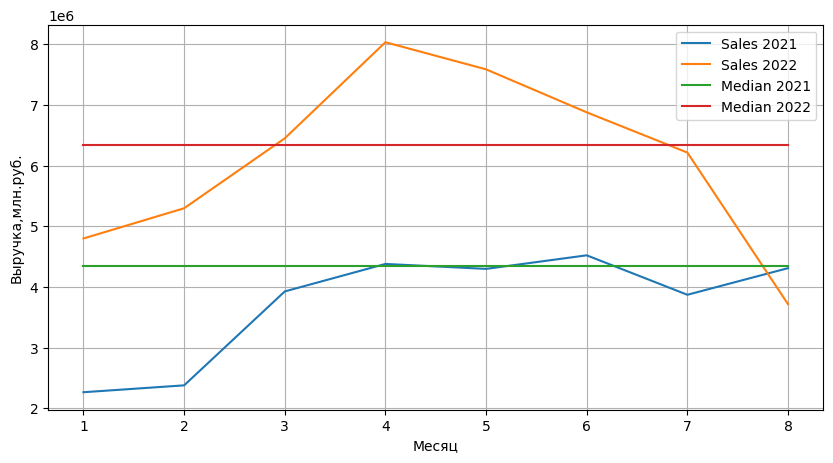

In [20]:
data_per_month.plot(kind='line', figsize=(10,5), grid=True)
plt.ylabel('Выручка,млн.руб.')
plt.xlabel('Месяц');

- В 2021 году наблюдается рост выручки с января по июнь
- Можно заметить, что выручка в 2022 г. заметно выше, чем в том же периоде 2021 г.
- В январе 2022 г. выручка достаточно низкая, вероятнее это связано с длинными праздничными и выходными днями в январе
- С мая по август 2022 г. наблюдается резкий спад выручки, значение даже ниже 2021 г.

In [21]:
#сопоставим выручки за весь 2021 и 8 месяцев 2022 г
revenue_21_tot=data.query('year == 2021')
revenue_22=data.query('year == 2022')

print('Выручка за 2021 г.: ', revenue_21_tot['service_amount'].sum())

print('Выручка за 8 месяцев 2022 г.: ', revenue_22['service_amount'].sum())

print('Рост выручки 2022 vs 2021 YTD август составил: ', '{:.2%}'.format((revenue_22['service_amount'].sum()/revenue_21_tot['service_amount'].sum()-1)))

Выручка за 2021 г.:  50561671
Выручка за 8 месяцев 2022 г.:  48986662
Рост выручки 2022 vs 2021 YTD август составил:  -3.12%


- Отставание выручки за 8 месяцев 2022 г. от выручки за 2021 год составило всего 3%
- Можно предположить, что при отсутствии провалов в последующие месяцы 2022 г и сохранении темпов роста выручки, выручка за 12 мес. 2022 г. будет выше выручки за 12 мес. 2021 г.

In [22]:
#сопоставим выручки за 2021 и 2022 г, выбрав данные только за 8 месяцев 2021 г
revenue_21=data.query('year == 2021 and month <= 8')


print('Выручка за 8 месяцев 2021 г.: ', revenue_21['service_amount'].sum())

print('Выручка за 8 месяцев 2022 г.: ', revenue_22['service_amount'].sum())

print('Рост выручки 2022 vs 2021 YTD август составил: ', '{:.2%}'.format((revenue_22['service_amount'].sum()/revenue_21['service_amount'].sum()-1)))


Выручка за 8 месяцев 2021 г.:  29957552
Выручка за 8 месяцев 2022 г.:  48986662
Рост выручки 2022 vs 2021 YTD август составил:  63.52%


- Выручка за 8 месяцев 2021 г составила 30 млн.руб.
- Выручка за 8 месяцев 2022 г составила 49 млн.руб.
- Рост выручки 63,52%

Проверим возможные факторы, повлиявшие на рост выручки

### Анализ числа клиентов медицинского центра

#### Анализ общего числа обращений

In [23]:
#Строим сводную таблицу по количеству обращений в клинику по месяцам в 2021 и 2022 гг.
patient_visits = data.pivot_table(index='month',columns='year',values='record_id', aggfunc='count')

patient_visits.columns=['Visits 2021','Visits 2022']

#Добавляем медианные значения посещений по годам

patient_visits['Median 2021']=patient_visits['Visits 2021'].median()
patient_visits['Median 2022']=patient_visits['Visits 2022'].median()

patient_visits

Visits 2021  Visits 2022  Median 2021  Median 2022
month                                                    
1           2021.0       4143.0       3828.5       5194.0
2           2120.0       4586.0       3828.5       5194.0
3           3696.0       5547.0       3828.5       5194.0
4           3869.0       6692.0       3828.5       5194.0
5           3788.0       6374.0       3828.5       5194.0
6           3915.0       5765.0       3828.5       5194.0
7           3545.0       4841.0       3828.5       5194.0
8           3782.0       3029.0       3828.5       5194.0
9           4229.0          NaN       3828.5       5194.0
10          5065.0          NaN       3828.5       5194.0
11          4074.0          NaN       3828.5       5194.0
12          4288.0          NaN       3828.5       5194.0

 - Из таблицы видно, что число посещений по месяцам в 2022 г. значительно выше
 - Медианное значение 2021 г - 3828 посещений, 2022 г - 5194 посещения
 - Исключение составляет август - в 2022 г. число визитов было меньше, чем в 2021

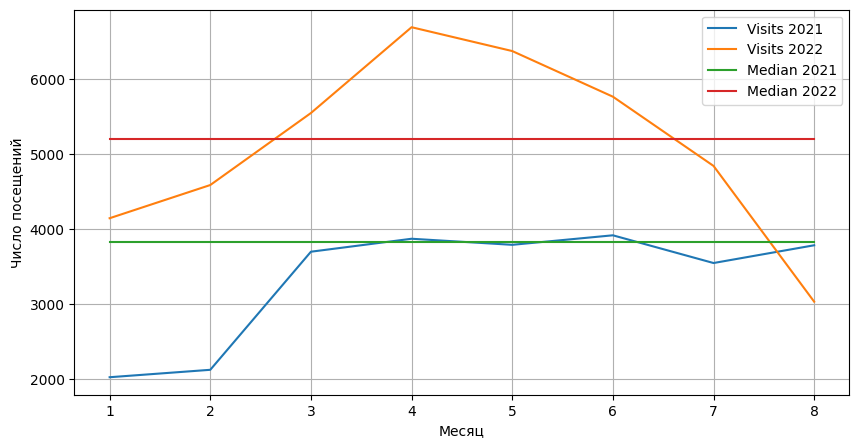

In [24]:
patient_visits=patient_visits.query('month <= 8') #отсечем данные за 8 месяцев
patient_visits.plot(kind='line', figsize=(10,5), grid=True)
plt.ylabel('Число посещений')
plt.xlabel('Месяц');

- Если сравнить график выручки и график числа посещений, можно заметить схожую динамику
- Заметен всплеск посещений в апреле 2022 г (гораздо выше медианного значения), по выручке также произошел всплеск в апреле
- Число посещений резко упало в августе 2022 г. - выручка в августе 2022 г. также "просела"
- С марта по август 2021 г. число посещений колебалось в пределах медианного значения - аналогично колебалась и выручка в 2021 г.
- Необходимо оценить, сколько уникальных клиентов обращалось в клинику за анализируемый период
- Стоит проанализировать также возраст посетитилей клиник, в частности август 2022г. - возможно отток клиентов стоит связать с началом мобилизации в сентябре 2022 г.

#### Анализ уникальных клиентов

In [25]:
#создаем профили клиентов
def get_profiles(data):

    profiles = (
        data.sort_values(by=['insured', 'service_date'])
        .groupby('insured')
        .agg({'service_date': 'first'})
        .rename(columns={'service_date': 'first_ts'})
        .reset_index()
    )

    return profiles

In [26]:
profiles = get_profiles(data)
profiles

insured   first_ts
0      125073 2021-01-11
1      125094 2021-01-22
2      125404 2021-08-04
3      139315 2021-12-28
4      139539 2021-04-15
...       ...        ...
4483  1306765 2022-08-30
4484  1306768 2022-08-08
4485  1306775 2022-08-07
4486  1306792 2022-08-12
4487  1306795 2022-08-09

[4488 rows x 2 columns]

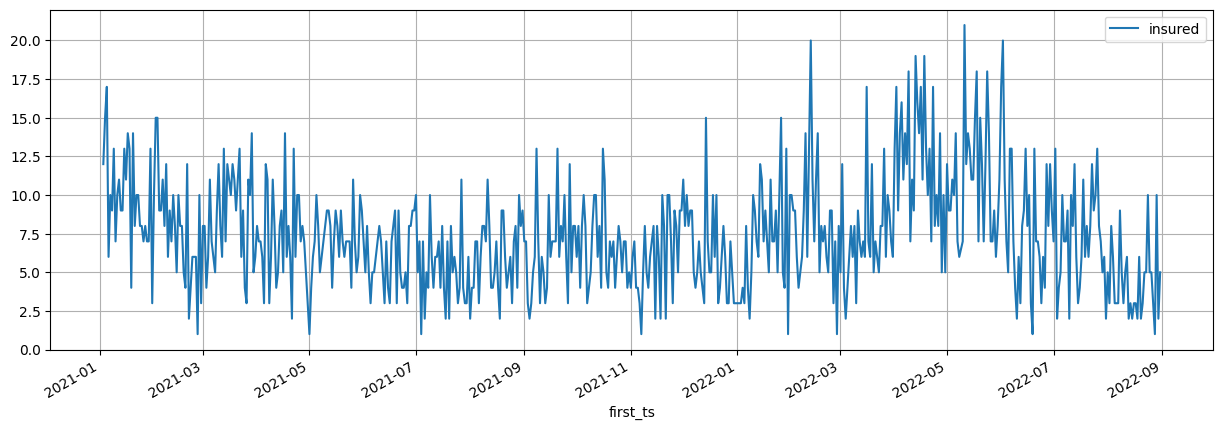

In [27]:
profiles.pivot_table(
    index='first_ts',
    values='insured', 
    aggfunc='nunique'
).plot(figsize=(15, 5), grid=True)

plt.show()

- Больше всего клиентов, впервые посетивших клинику (в период с 01.01.2022 по 31.08.2022) приходится на первую половину 2022 г.
- Ниже рассмотрим количество уникальных клиентов, обращавшихся в клинику, по месяцам

In [28]:
patients_unique=data.pivot_table(index='month',
                                 columns='year',
                                 values='insured',
                                 aggfunc='nunique')

patients_unique.columns=['Patients 2021','Patients 2022']

#Добавляем медианные значения посещений по годам

patients_unique['Median 2021']=patients_unique['Patients 2021'].median()
patients_unique['Median 2022']=patients_unique['Patients 2022'].median()
patients_unique

Patients 2021  Patients 2022  Median 2021  Median 2022
month                                                        
1              286.0          555.0        468.0        651.5
2              309.0          589.0        468.0        651.5
3              446.0          662.0        468.0        651.5
4              467.0          794.0        468.0        651.5
5              469.0          802.0        468.0        651.5
6              435.0          738.0        468.0        651.5
7              447.0          641.0        468.0        651.5
8              488.0          359.0        468.0        651.5
9              559.0            NaN        468.0        651.5
10             591.0            NaN        468.0        651.5
11             539.0            NaN        468.0        651.5
12             560.0            NaN        468.0        651.5

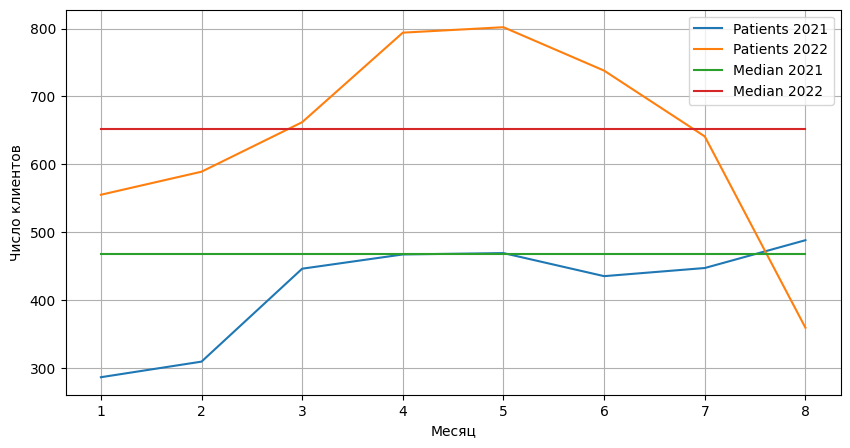

In [29]:
patients_unique=patients_unique.query('month <= 8') #отсечем данные за 8 месяцев
patients_unique.plot(kind='line', figsize=(10,5), grid=True)
plt.ylabel('Число клиентов')
plt.xlabel('Месяц');

- Динамика числа уникальных клиентов схожа с динамикой выручки и общим число посещений клиники
- По числу посещений и выручки есть резкий всплекс в апреле 2022 г, здесь же на графике число уникальных клиентов в апреле даже немного выше, чем в марте. Вероятно, какие-то клиенты в апреле провели больше процедур, чем в другие месяцы
- Число уникальных клиентов в августе резко упало, аналогично числу посещений и выручке
- С марта по август 2021 г. число уникальных клиентов варьировалось в пределах медианного значения - аналогично выручке и общему числу посещений с 03.2021 по 08.2023

### Анализ категорий медицинских услуг

In [30]:
med_category=data.pivot_table(index='service_category', columns='year',
                              values='service_amount',
                              aggfunc=['count','sum'])
med_category.columns=['Q-ty 2021','Q-ty 2022', 'Revenue 2021', 'Revenue 2022']
med_category['Average price 2021']=med_category['Revenue 2021']/med_category['Q-ty 2021']
med_category['Average price 2022']=med_category['Revenue 2022']/med_category['Q-ty 2022']
med_category['Price change 2022vs2021, %']=(med_category['Average price 2022']/med_category['Average price 2021']-1)*100
pd.options.display.float_format = '{:.2f}'.format 
med_category=med_category.reset_index()
med_category.sort_values(by='Price change 2022vs2021, %', ascending=False)

service_category  Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
10          Отоларингология        500        444        405310        457740   
6                       МРТ         71          6        465370         45740   
4   Компьютерная томография         32          2        184035         13230   
3      Гинекология/урология       1284       2640       1652762       3778100   
9                    Массаж        956        885       1152673       1159250   
20                ЭКГ/ЭхоКГ       1194       1210       1216458       1337025   
21    Электронейромиография         64        112        213910        403110   
0                   Анализы      12434      11057       5950223       5647968   
19             Физиотерапия       1258       1384       1391716       1627520   
13          Повторный прием       5335       3780       7101469       5268440   
12          Первичный прием       7412       6372      11041945       9913985   
14                   Прочее       4318       3613       5073407       4431670   
16          Рефлексотерапия        460        342        852138        661020   
15           Рентгенография       1151       1335       1907444       2303610   
18                      УЗИ       2113       2048       4483975       4524360   
5             Лазеротерапия        657        656        612136        633870   
22             Электрофорез        250        134        228514        126950   
8        Мануальная терапия        731        689       1787593       1742390   
11            Офтальмология       1667       1410       1226189       1068814   
17    Сестринские процедуры        566        424        549406        382560   
1                   Биопсия         14         10         54254         34960   
7            Магнитотерапия       1568       1470       2149215       1665060   
2         Гастроэнтерология        357        954        861529       1759290   

    Average price 2021  Average price 2022  Price change 2022vs2021, %  
10              810.62             1030.95                       27.18  
6              6554.51             7623.33                       16.31  
4              5751.09             6615.00                       15.02  
3              1287.20             1431.10                       11.18  
9              1205.72             1309.89                        8.64  
20             1018.81             1104.98                        8.46  
21             3342.34             3599.20                        7.68  
0               478.54              510.80                        6.74  
19             1106.29             1175.95                        6.30  
13             1331.11             1393.77                        4.71  
12             1489.74             1555.87                        4.44  
14             1174.94             1226.59                        4.40  
16             1852.47             1932.81                        4.34  
15             1657.21             1725.55                        4.12  
18             2122.09             2209.16                        4.10  
5               931.71              966.27                        3.71  
22              914.06              947.39                        3.65  
8              2445.41             2528.87                        3.41  
11              735.57              758.02                        3.05  
17              970.68              902.26                       -7.05  
1              3875.29             3496.00                       -9.79  
7              1370.67             1132.69                      -17.36  
2              2413.25             1844.12                      -23.58

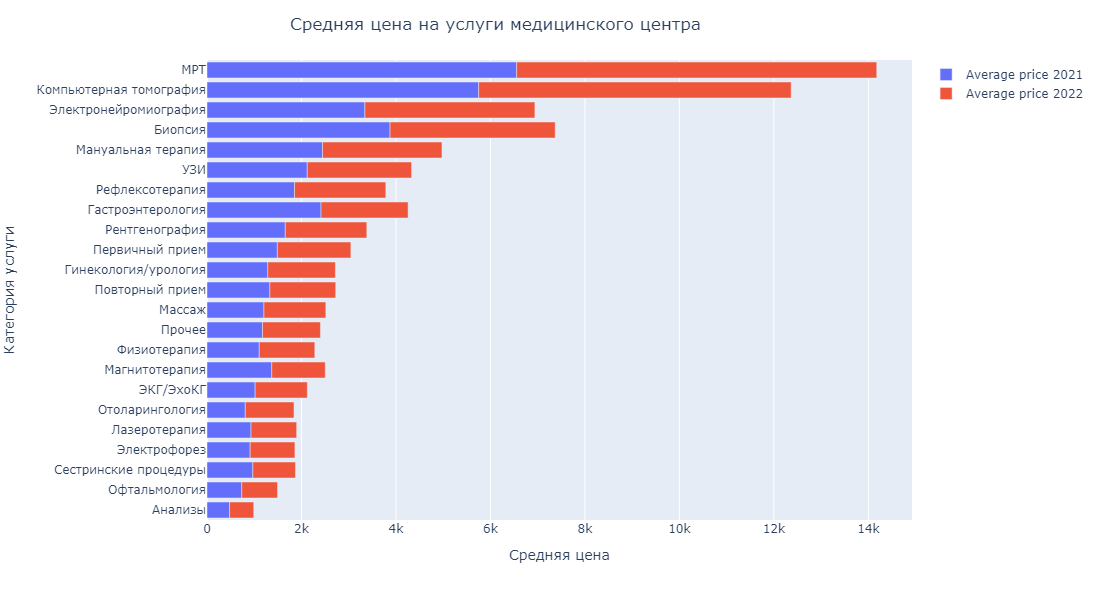

In [31]:
#строим график по сводной таблице
fig = px.bar(med_category.sort_values(by='Average price 2022'), y='service_category', x=['Average price 2021','Average price 2022'])
fig.update_layout(title='Средняя цена на услуги медицинского центра',
                  title_x=0.45,
                  width=1000,
                  height=600,
                   xaxis_title='Средняя цена',
                   yaxis_title='Категория услуги',
                 legend_title_text='')
fig.show()

In [32]:
#посчитаем аналогичные данные за 8 месяцев
med_category1=data.query('month <= 8').pivot_table(index='service_category', columns='year',
                              values='service_amount',
                              aggfunc=['count','sum'])
med_category1.columns=['Q-ty 2021','Q-ty 2022', 'Revenue 2021', 'Revenue 2022']
med_category1['Average price 2021']=med_category1['Revenue 2021']/med_category1['Q-ty 2021']
med_category1['Average price 2022']=med_category1['Revenue 2022']/med_category1['Q-ty 2022']
med_category1['Price change 2022vs2021, %']=(med_category1['Average price 2022']/med_category1['Average price 2021']-1)*100

med_category1=med_category1.reset_index()
med_category1.sort_values(by='Price change 2022vs2021, %', ascending=False)

service_category  Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
10          Отоларингология        305        444        221886        457740   
4   Компьютерная томография         24          2        129150         13230   
3      Гинекология/урология        652       2640        785127       3778100   
6                       МРТ         43          6        278775         45740   
9                    Массаж        497        885        584361       1159250   
19             Физиотерапия        707       1384        762676       1627520   
20                ЭКГ/ЭхоКГ        730       1210        743340       1337025   
0                   Анализы       7523      11057       3548934       5647968   
21    Электронейромиография         43        112        143220        403110   
13          Повторный прием       3323       3780       4363099       5268440   
22             Электрофорез        110        134         98230        126950   
12          Первичный прием       4534       6372       6665265       9913985   
16          Рефлексотерапия        313        342        571851        661020   
5             Лазеротерапия        344        656        314416        633870   
15           Рентгенография        653       1335       1072273       2303610   
18                      УЗИ       1293       2048       2731151       4524360   
8        Мануальная терапия        415        689       1011365       1742390   
11            Офтальмология       1055       1410        771482       1068814   
14                   Прочее       2792       3613       3330183       4431670   
1                   Биопсия          6         10         20454         34960   
17    Сестринские процедуры        388        424        367445        382560   
7            Магнитотерапия        873       1470       1087720       1665060   
2         Гастроэнтерология        113        954        355149       1759290   

    Average price 2021  Average price 2022  Price change 2022vs2021, %  
10              727.50             1030.95                       41.71  
4              5381.25             6615.00                       22.93  
3              1204.18             1431.10                       18.84  
6              6483.14             7623.33                       17.59  
9              1175.78             1309.89                       11.41  
19             1078.75             1175.95                        9.01  
20             1018.27             1104.98                        8.51  
0               471.74              510.80                        8.28  
21             3330.70             3599.20                        8.06  
13             1313.00             1393.77                        6.15  
22              893.00              947.39                        6.09  
12             1470.06             1555.87                        5.84  
16             1827.00             1932.81                        5.79  
5               914.00              966.27                        5.72  
15             1642.07             1725.55                        5.08  
18             2112.26             2209.16                        4.59  
8              2437.02             2528.87                        3.77  
11              731.26              758.02                        3.66  
14             1192.76             1226.59                        2.84  
1              3409.00             3496.00                        2.55  
17              947.02              902.26                       -4.73  
7              1245.96             1132.69                       -9.09  
2              3142.91             1844.12                      -41.32

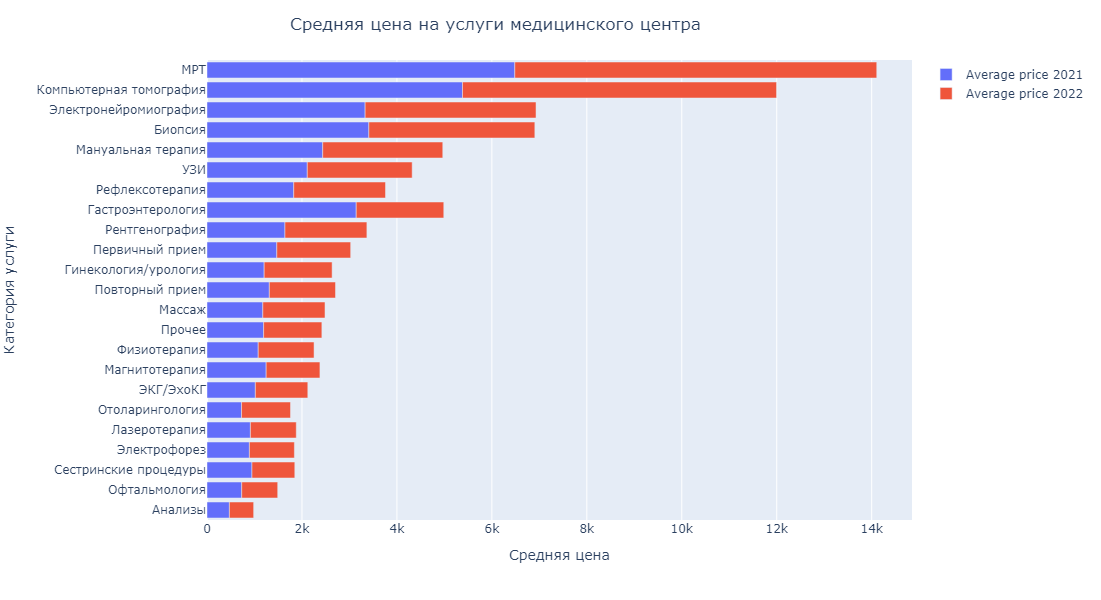

In [33]:
#строим график по сводной таблице
fig = px.bar(med_category1.sort_values(by='Average price 2022'), y='service_category', x=['Average price 2021','Average price 2022'])
fig.update_layout(title='Средняя цена на услуги медицинского центра',
                  title_x=0.45,
                  width=1000,
                  height=600,
                   xaxis_title='Средняя цена',
                   yaxis_title='Категория услуги',
                 legend_title_text='')
fig.show()

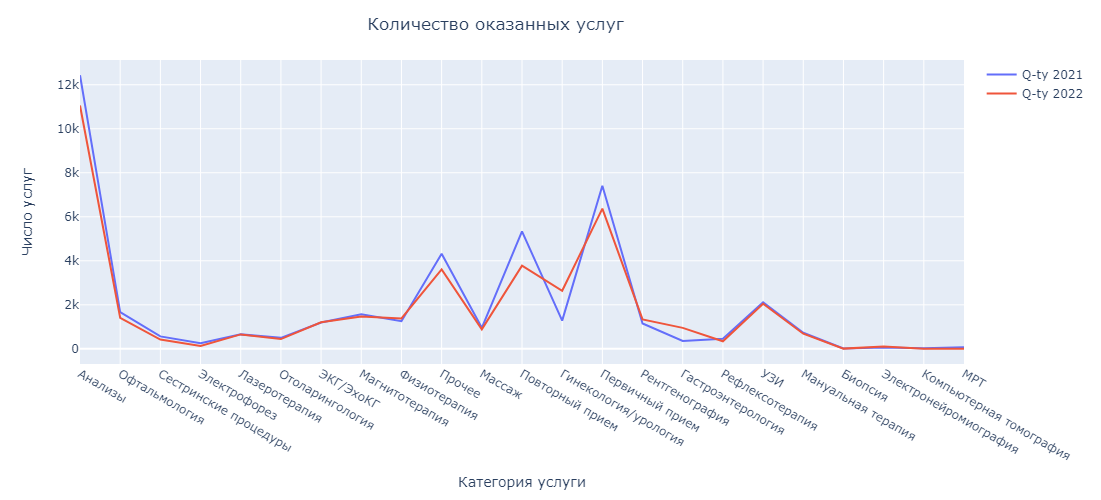

In [34]:
fig = px.line(med_category.sort_values(by='Average price 2022'), x='service_category', y=['Q-ty 2021','Q-ty 2022'])
fig.update_layout(title='Количество оказанных услуг',
                  title_x=0.45,
                  width=1000,
                  height=500,
                   yaxis_title='Число услуг',
                   xaxis_title='Категория услуги',
                 legend_title_text='')
fig.show()

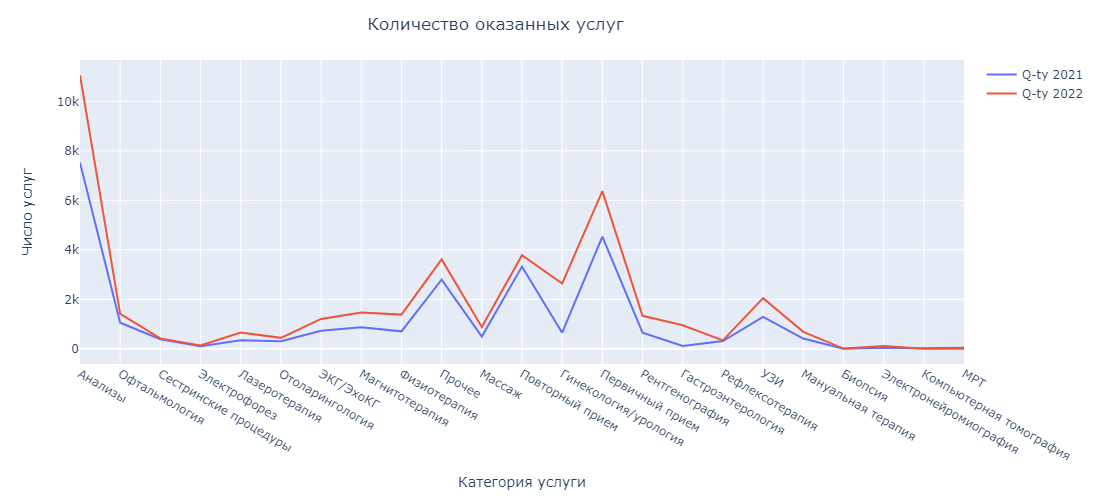

In [35]:
#график за 8 месяцев
fig = px.line(med_category1.sort_values(by='Average price 2022'), x='service_category', y=['Q-ty 2021','Q-ty 2022'])
fig.update_layout(title='Количество оказанных услуг',
                  title_x=0.45,
                  width=1000,
                  height=500,
                   yaxis_title='Число услуг',
                   xaxis_title='Категория услуги',
                 legend_title_text='')
fig.show()

- По количеству оказанных услуг сильного отставания 2021г от 2022г не наблюдается
- В целом средняя цена на услуги в 2022 г. выросла по сравнению с 2021 г.
- Самый высокий рост средний цен выявлен по трем категориям: "отоларингология", "МРТ" и "КТ"
- Средняя цена снизилась по категориям "Сестринские процедуры" (инъекции, капельницы, перевязки и т.п.), "Биопсия", "Магнитотерапия" и "Гастроэнтерология"

### Анализ возрастных категорий клиентов

In [36]:
#разделим клиентов на категории по возрастам
def age_group(age):
    if age['age_for_service_date'] <= 12:
        val = '0-12'
    elif age['age_for_service_date'] <= 18:
        val = '13-18'
    elif age['age_for_service_date'] <= 24:
        val = '19-24'
    elif age['age_for_service_date'] <= 44:
        val = '25-44'
    elif age['age_for_service_date'] <= 59:
        val = '45-59'
    elif age['age_for_service_date'] <= 74:
        val = '60-74'
    else:
        val = '75+'
    return val

data['age_category'] = data.apply(age_group, axis=1)
data.head(10)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   
5  30268157503   2021-01-24   
6  30268157603   2021-01-24   
7  30268157703   2021-01-26   
8  30268157803   2021-01-26   
9  30268157903   2021-01-26   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   
5                                 С-реактивный белок             420   
6                Взятие крови из периферической вены             158   
7                                    Прием первичный            1470   
8                           Магнитотерапия (1 сеанс)            1040   
9                     УВЧ-терапия (1 сеанс) (1 поле)            1040   

   service_number  insured  sex_id  age_for_service_date  year  \
0               1   490777    2.00                    26  2021   
1               1   490777    2.00                    26  2021   
2               1   490777    2.00                    26  2021   
3               1   490777    2.00                    26  2021   
4               1   490777    2.00                    26  2021   
5               1   490777    2.00                    26  2021   
6               1   490777    2.00                    26  2021   
7               1   490777    2.00                    26  2021   
8               1   490777    2.00                    26  2021   
9               1   490777    2.00                    26  2021   

  service_category  month age_category  
0  Первичный прием      1        25-44  
1          Анализы      1        25-44  
2          Анализы      1        25-44  
3          Анализы      1        25-44  
4           Прочее      1        25-44  
5          Анализы      1        25-44  
6          Анализы      1        25-44  
7  Первичный прием      1        25-44  
8   Магнитотерапия      1        25-44  
9     Физиотерапия      1        25-44

In [37]:
patients_age=data.pivot_table(index='age_category',
                                 columns='year',
                                 values='insured',
                                 aggfunc='nunique')

patients_age.columns=['Patients 2021','Patients 2022']
patients_age['patients change, %']=(patients_age['Patients 2022']/patients_age['Patients 2021']-1)*100
patients_age=patients_age.reset_index()

patients_age.sort_values(by='patients change, %', ascending=False)

age_category  Patients 2021  Patients 2022  patients change, %
2        19-24            183            247               34.97
3        25-44           1653           1868               13.01
5        60-74             44             46                4.55
4        45-59            295            291               -1.36
0         0-12            304            274               -9.87
1        13-18             57             40              -29.82
6          75+              2              1              -50.00

- Самая многочисленная группа пациентов находится в категории 25-44
- Больше всего прирост клиентов произошел в группах "19-24", "25-44" и "60-74"
- Рассмотрим распределение данных групп по месяцам

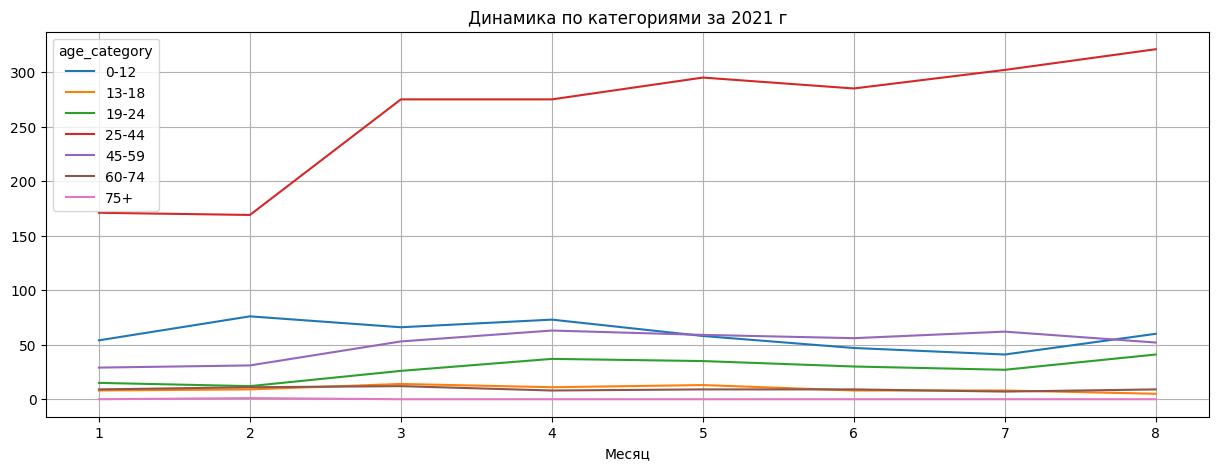

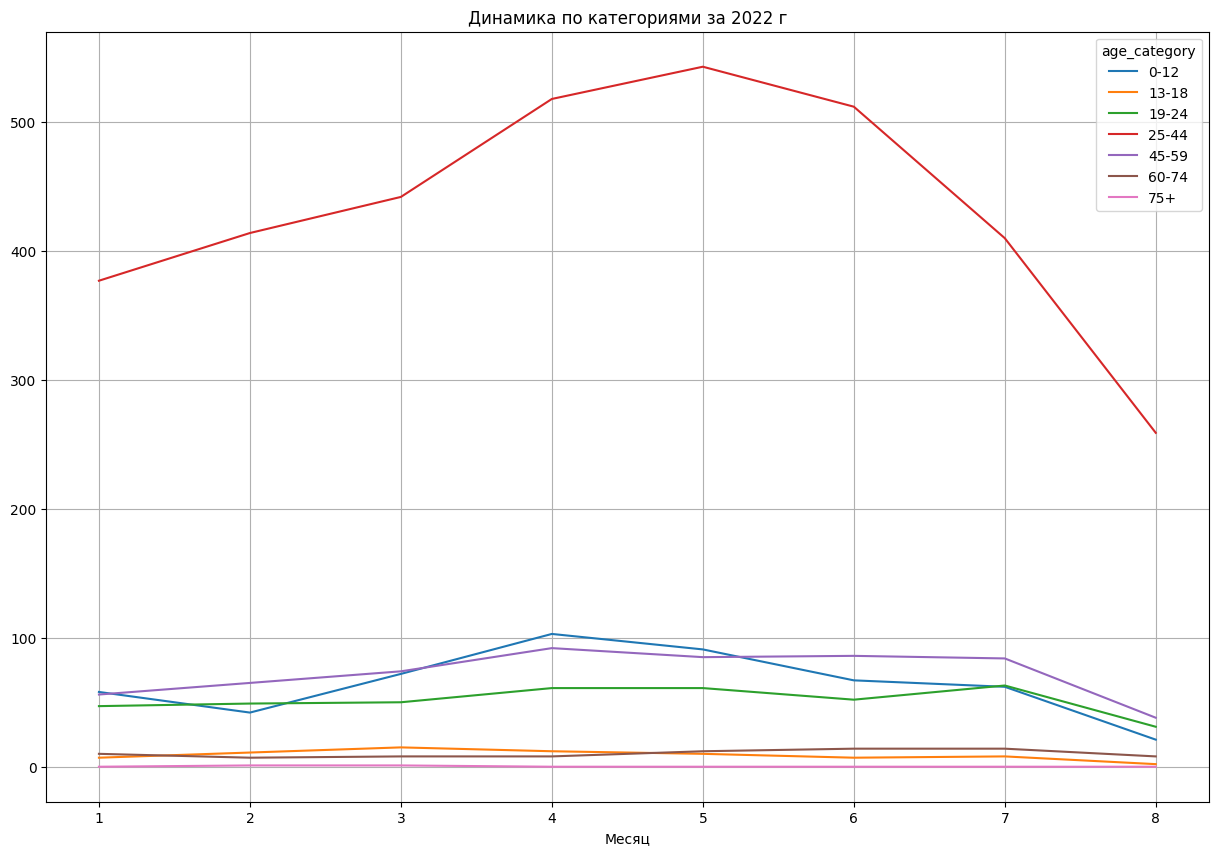

In [38]:
data.query('year == 2021 and month <=8').pivot_table(index='month',
                                 columns='age_category',
                                 values='insured',
                                 aggfunc='nunique').fillna(0).plot(figsize=(15,5), grid=True);
plt.title('Динамика по категориями за 2021 г')
plt.xlabel('Месяц')

data.query('year == 2022').pivot_table(index='month',
                                 columns='age_category',
                                 values='insured',
                                 aggfunc='nunique').fillna(0).plot(figsize=(15,10), grid=True);
plt.title('Динамика по категориями за 2022 г')
plt.xlabel('Месяц');

- По сравнению с 2021 г., в 2022 г. численность категории "25-44" гораздо выше
- При этом начиная с июля 2022 категория "25-44" начинает снижаться (возможно, причина в мобилизации в сентябре 2022г, произошел отток (молодые люди массово уезжали заграницу))

In [39]:
age_price=data.query('month <=8').pivot_table(index='age_category', columns='year',
                              values='service_amount',
                              aggfunc=['count','sum'])
age_price.columns=['Q-ty 2021','Q-ty 2022', 'Revenue 2021', 'Revenue 2022']
age_price['Average price 2021']=age_price['Revenue 2021']/age_price['Q-ty 2021']
age_price['Average price 2022']=age_price['Revenue 2022']/age_price['Q-ty 2022']
age_price['Price change 2022vs2021, %']=(age_price['Average price 2022']/age_price['Average price 2021']-1)*100
age_price=age_price.reset_index()
age_price.sort_values(by='Price change 2022vs2021, %', ascending=False)

age_category  Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
2        19-24       1636       2996       1773891       3648549   
3        25-44      18295      28725      20372856      34591991   
1        13-18        311        405        339768        476086   
4        45-59       3775       5567       4253737       6498367   
0         0-12       1982       2489       2251508       2808894   
5        60-74        736        759        964322        931265   
6          75+          1         36          1470         31510   

   Average price 2021  Average price 2022  Price change 2022vs2021, %  
2             1084.29             1217.81                       12.31  
3             1113.58             1204.25                        8.14  
1             1092.50             1175.52                        7.60  
4             1126.82             1167.30                        3.59  
0             1135.98             1128.52                       -0.66  
5             1310.22             1226.96                       -6.35  
6             1470.00              875.28                      -40.46

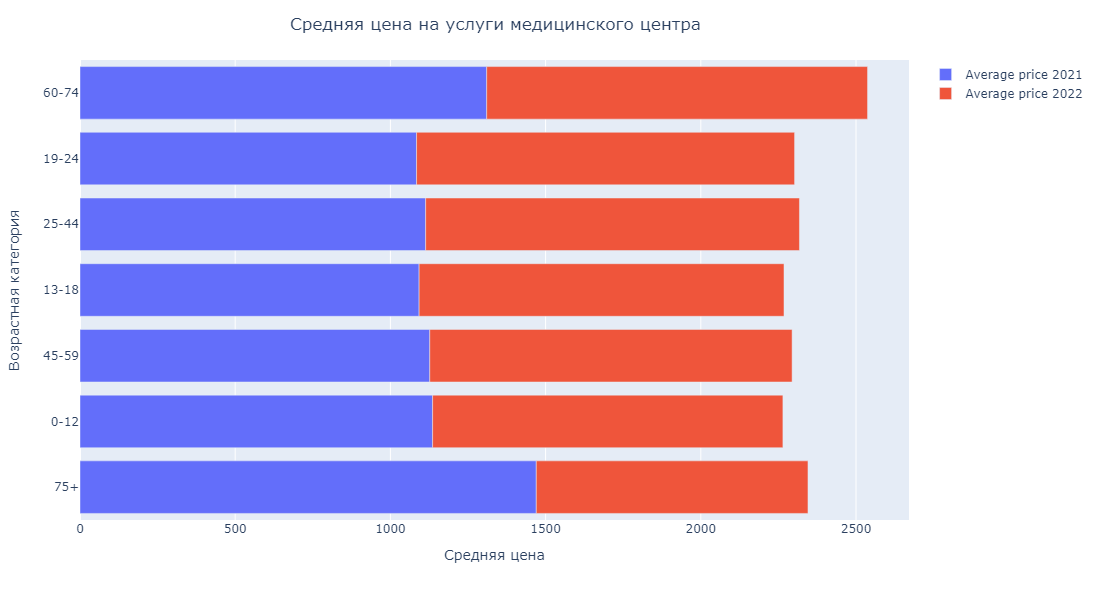

In [40]:
#строим график по сводной таблице
fig = px.bar(age_price.sort_values(by='Average price 2022'), y='age_category', x=['Average price 2021','Average price 2022'])
fig.update_layout(title='Средняя цена на услуги медицинского центра',
                  title_x=0.45,
                  width=1000,
                  height=600,
                   xaxis_title='Средняя цена',
                   yaxis_title='Возрастная категория',
                 legend_title_text='')
fig.show()

- Самая высокая средняя цена в категориях "60-74", "19-24", "25-44" - возможно, такие клиенты чаще приобретают дорогие процедуры (МРТ и КТ, например)
- В группе 75+ самая низкая цена, возможно, основные услуги данной категории - Анализы, ЭКГ, капельницы
- Средняя цена в 2022 г выросла по всем категориям, кроме "75+" и "60-74"

### Анализ по половому признаку

In [41]:
#отсекаем из данных строчких, в которых нет данных о поле клиента
data_sex=data.query('sex_id >=1')
data_sex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85348 entries, 0 to 85368
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             85348 non-null  int64         
 1   service_date          85348 non-null  datetime64[ns]
 2   service_name          85348 non-null  object        
 3   service_amount        85348 non-null  int64         
 4   service_number        85348 non-null  int64         
 5   insured               85348 non-null  int64         
 6   sex_id                85348 non-null  float64       
 7   age_for_service_date  85348 non-null  int64         
 8   year                  85348 non-null  int32         
 9   service_category      85348 non-null  object        
 10  month                 85348 non-null  int32         
 11  age_category          85348 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(3)
memory usage: 7

In [42]:
data_sex.query('service_category == "Гинекология/урология"').pivot_table(index='service_name', columns='sex_id', values='insured',
                                                                 aggfunc='nunique')

sex_id                                              1.00   2.00
service_name                                                   
Гинекологический мазок                               NaN 849.00
Прием гинеколога, главного специалиста, врача -...   NaN  16.00
Прием гинеколога, первичный                          NaN 553.00
Прием гинеколога, повторный                          NaN 508.00
Прием гинеколога, профессора                         NaN   2.00
Ударно- волновая терапия (урология, гинекология...  1.00    NaN
Ультразвуковое исследование гинекология (сочета...   NaN  34.00
Ультразвуковое исследование гинекология абдомин...   NaN  22.00
Ультразвуковое исследование гинекология трансва...   NaN  30.00
Ультразвуковое исследование гинекология трансва...   NaN 635.00
Ультразвуковое исследование гинекология трансва...   NaN   1.00
Ультразвуковое исследование гинекология трансре...   NaN   2.00
Ультразвуковое исследование гинекология-ранние ...   NaN   1.00

По услугам из сводной таблицы можно сделать вывод, что идентификаторы распределены так:
 - 1 = мужчины
 - 2 = женщины

In [43]:
def gender_group(sex):
    if sex['sex_id'] == 2:
        val = 'женщины'
    else:
        val = 'мужчины'
    return val

data['gender'] = data.apply(gender_group, axis=1)

In [44]:
data_sex=data.query('sex_id >= 1')
data_sex.head(3)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   

   service_number  insured  sex_id  age_for_service_date  year  \
0               1   490777    2.00                    26  2021   
1               1   490777    2.00                    26  2021   
2               1   490777    2.00                    26  2021   

  service_category  month age_category   gender  
0  Первичный прием      1        25-44  женщины  
1          Анализы      1        25-44  женщины  
2          Анализы      1        25-44  женщины

In [45]:
patients_sex=data_sex.pivot_table(index='gender',
                                 columns='year',
                                 values='insured',
                                 aggfunc='nunique')

patients_sex.columns=['Patients 2021','Patients 2022']
total_2021=patients_sex['Patients 2021'].sum()
total_2022=patients_sex['Patients 2022'].sum()
patients_sex['share 2021']=patients_sex['Patients 2021']/total_2021*100
patients_sex['share 2022']=patients_sex['Patients 2022']/total_2022*100
patients_sex=patients_sex.reset_index()

patients_sex

gender  Patients 2021  Patients 2022  share 2021  share 2022
0  женщины           1428           1593       56.80       57.78
1  мужчины           1086           1164       43.20       42.22

In [46]:
#проверим число посещений мед.центра мужчинами и женщинами (за 8 месяцев 2021 и 8 месяцев 2022)
gender_service=data_sex.query('month <=8').pivot_table(index='gender',
                                 columns='year',
                                 values='record_id',
                                 aggfunc='count')
gender_service=gender_service.reset_index()
gender_service['q-ty change']=(gender_service[2022]/gender_service[2021]-1)*100

gender_service

year   gender   2021   2022  q-ty change
0     женщины  16544  25795        55.92
1     мужчины  10171  15182        49.27

- В целом число клиентов (как женщин, так и мужчин) выросло в 2022 г по сравнению с 2021 г
- Доля мужчин снизилась с 43,2% до 42,22%
- Доля женщин выросла в 56,8% до 57,78%
- Женщины обращаются в медицинский центр чаще мужчин (25795 посещений в 2022 женщинами и 15182 посещений в 2022 мужчинами, разница почти в 1,7 раз)
- Если сравнивать число посещений за 8 месяцев, то в 2022 г число посещений среди женщин увеличилось на 55,92%, среди мужчин на 49,27%

In [47]:
gender_price=data_sex.query('month <= 8').pivot_table(index='gender', columns='year',
                              values='service_amount',
                              aggfunc=['count','sum'])
gender_price.columns=['Q-ty 2021','Q-ty 2022', 'Revenue 2021', 'Revenue 2022']

gender_price['Average price 2021']=gender_price['Revenue 2021']/gender_price['Q-ty 2021']
gender_price['Average price 2022']=gender_price['Revenue 2022']/gender_price['Q-ty 2022']

gender_price['Price change 2022vs2021, %']=(gender_price['Average price 2022']/gender_price['Average price 2021']-1)*100
gender_price=gender_price.reset_index()
gender_price.sort_values(by='Price change 2022vs2021, %', ascending=False)

gender  Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
0  женщины      16544      25795      18369413      30926035   
1  мужчины      10171      15182      11566224      18060627   

   Average price 2021  Average price 2022  Price change 2022vs2021, %  
0             1110.34             1198.92                        7.98  
1             1137.18             1189.61                        4.61

- Сильного различия между средней ценой на услуги, приобретенные женщинами, и средней ценой на услуги, приобретенные мужчинами, нет
- Рост цен по женщинам составил 8%, по мужчинам 5%, возможно, в 2022 г. женщины приобретали более дорогие услуги

##### Проверим Топ-3 категории медицинских услуг среди мужчин и женщин

In [48]:
#составим сводную таблицу только для женщин (для сравнения возьмем только 8 месяцев 2021 и 8 месяцев 2022)
data_fem=data_sex.query('sex_id == 2 and month <= 8').pivot_table(index='service_category',
                                               columns='year',
                                               values='service_amount',
                                               aggfunc=['count','sum'])
data_fem.columns=['Q-ty 2021','Q-ty 2022', 'Revenue 2021', 'Revenue 2022']

data_fem['Average price 2021']=data_fem['Revenue 2021']/data_fem['Q-ty 2021']
data_fem['Average price 2022']=data_fem['Revenue 2022']/data_fem['Q-ty 2022']

#выберем топ-3 услуги по самой высокой цене 2022
data_fem.sort_values(by='Average price 2022', ascending=False).head(3)

Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
service_category                                                          
МРТ                        20.00       4.00     134295.00      30300.00   
Электронейромиография      26.00      78.00      90615.00     284600.00   
Биопсия                     5.00      10.00      15204.00      34960.00   

                       Average price 2021  Average price 2022  
service_category                                               
МРТ                               6714.75             7575.00  
Электронейромиография             3485.19             3648.72  
Биопсия                           3040.80             3496.00

In [49]:
#выберем топ-3 услуги по самой высокой выручке 2022 г
data_fem.sort_values(by='Revenue 2022', ascending=False).head(3)

Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
service_category                                                         
Первичный прием         2775.00    3766.00    4079535.00    5860855.00   
Анализы                 4879.00    7031.00    2428115.00    3789781.00   
Гинекология/урология     647.00    2640.00     772002.00    3778100.00   

                      Average price 2021  Average price 2022  
service_category                                              
Первичный прием                  1470.10             1556.25  
Анализы                           497.67              539.01  
Гинекология/урология             1193.20             1431.10

Среди женщин: 
- Топ 3 категории по самой высокой цене - это МРТ, Электронейромиография и Биопсия
- Топ 3 категории по самой высокой выручке - это Превичная консультация врача, Анализы и Гинекология

In [50]:
#составим сводную таблицу только для мужчин (для сравнения возьмем только 8 месяцев 2021 и 8 месяцев 2022)
data_male=data_sex.query('sex_id == 1 and month <= 8').pivot_table(index='service_category',
                                               columns='year',
                                               values='service_amount',
                                               aggfunc=['count','sum'])
data_male.columns=['Q-ty 2021','Q-ty 2022', 'Revenue 2021', 'Revenue 2022']

data_male['Average price 2021']=data_male['Revenue 2021']/data_male['Q-ty 2021']
data_male['Average price 2022']=data_male['Revenue 2022']/data_male['Q-ty 2022']

#выберем топ-3 услуги по самой высокой цене 2022
data_male.sort_values(by='Average price 2022', ascending=False).head(3)

Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
service_category                                                            
МРТ                          23.00       2.00     144480.00      15440.00   
Компьютерная томография      11.00       2.00      67725.00      13230.00   
Электронейромиография        17.00      34.00      52605.00     118510.00   

                         Average price 2021  Average price 2022  
service_category                                                 
МРТ                                 6281.74             7720.00  
Компьютерная томография             6156.82             6615.00  
Электронейромиография               3094.41             3485.59

In [51]:
#выберем топ-3 услуги по самой высокой выручке 2022
data_male.sort_values(by='Revenue 2022', ascending=False).head(3)

Q-ty 2021  Q-ty 2022  Revenue 2021  Revenue 2022  \
service_category                                                     
Первичный прием     1754.00    2606.00    2578380.00    4053130.00   
Повторный прием     1213.00    1636.00    1592669.00    2280600.00   
Анализы             2634.00    4026.00    1117596.00    1858187.00   

                  Average price 2021  Average price 2022  
service_category                                          
Первичный прием              1470.00             1555.31  
Повторный прием              1313.00             1394.01  
Анализы                       424.30              461.55

Среди мужчин: 
- Топ 3 категории по самой высокой цене - это МРТ, КТ и Электронейромиография
- Топ 3 категории по самой высокой выручке - это Первичная консультация врача, Повторный прием и Анализы

In [52]:
#сопоставим выручки за 2021 и 2022 г, выбрав данные только за 8 месяцев 2021 г и разбив их по половому признаку
revenue_21_fem=data.query('year == 2021 and month <= 8 and sex_id == 2')
revenue_22_fem=data.query('year == 2022 and month <= 8 and sex_id == 2')
revenue_21_male=data.query('year == 2021 and month <= 8 and sex_id == 1')
revenue_22_male=data.query('year == 2022 and month <= 8 and sex_id == 1')

print('Выручка за 8 месяцев 2021 г. по женщинам: ', revenue_21_fem['service_amount'].sum())
print('Выручка за 8 месяцев 2022 г. по женщинам: ', revenue_22_fem['service_amount'].sum())

print('Выручка за 8 месяцев 2021 г. по мужчинам: ', revenue_21_male['service_amount'].sum())
print('Выручка за 8 месяцев 2022 г. по мужчинам: ', revenue_22_male['service_amount'].sum())

print('Рост выручки 2022 vs 2021 YTD август среди женщин составил: ', '{:.2%}'.format((revenue_22_fem['service_amount'].sum()/
                                                                                       revenue_21_fem['service_amount'].sum()-1)))
print('Рост выручки 2022 vs 2021 YTD август среди мужчин составил: ', '{:.2%}'.format((revenue_22_male['service_amount'].sum()/
                                                                                       revenue_21_male['service_amount'].sum()-1)))

Выручка за 8 месяцев 2021 г. по женщинам:  18369413
Выручка за 8 месяцев 2022 г. по женщинам:  30926035
Выручка за 8 месяцев 2021 г. по мужчинам:  11566224
Выручка за 8 месяцев 2022 г. по мужчинам:  18060627
Рост выручки 2022 vs 2021 YTD август среди женщин составил:  68.36%
Рост выручки 2022 vs 2021 YTD август среди мужчин составил:  56.15%


- В целом средние цены на топ-3 самые дорогие услуги у мужчин выше
- Ранее выяснили, что женщины получают больше услуг, чем мужчины в 1,7 раз, что невелирует разницу в ценах
- Рост выручки на услуги, приобретенные женщинами, выше, чем приобретенные мужчинами (по женщинам +68,36%, по мужчинам +56,15%)

## 4. Выводы

1. Выручка за 8 месяцев 2022 г. выросла более чем на 60% по сравнению с выручкой за 8 месяцев 2021 г
2. Отставание выручки за 8 месяцев 2022г от выручки за весь 2021 г составило -3% - при сохранении динамики есть вероятность, что за 12 месяцев 2022 г. выручка будет выше ввыручки за 12 мес 2021 г
3. Число оказываемых услуг мед.центра увеличилось в 2022 г по сравнению с 2021 г., что повлекло за собой увеличение выручки
4. Число посещений снизилось в августе 2022 г. - более подробный анализ выявил значительно снижений по клиентам возрастом от 25 до 44 лет (вероятнее всего влияние мобилизации в сентябре 2022)
5. Анализ категорий медицинских услуг выявил рост цен практически по всем услугам, в частности самый высокий рост выявлен по 2 самым дорогим категориям: МРТ и КТ, также высокий рост цен наблюдается по категориям Отоларингология и Гинекология
6. Мужчины получают более дорогие услуги (средние цены на топ категории выше у мужчин), однако горзадо большее число услуг клиники оказано женщинам, что нивелирует разницу в ценах. Больше выручки клинике приносят именно женщины